In [1]:
from isaacgym.torch_utils import *
import torch
import json
import numpy as np

from poselib.core.rotation3d import *
from poselib.skeleton.skeleton3d import SkeletonTree, SkeletonState, SkeletonMotion
from poselib.visualization.common import plot_skeleton_state, plot_skeleton_motion_interactive, plot_skeleton_states


Importing module 'gym_37' (/home/dan/Projects/dynamic_motion_imitation/IsaacGym_Preview_4_Package/isaacgym/python/isaacgym/_bindings/linux-x86_64/gym_37.so)
Setting GYM_USD_PLUG_INFO_PATH to /home/dan/Projects/dynamic_motion_imitation/IsaacGym_Preview_4_Package/isaacgym/python/isaacgym/_bindings/linux-x86_64/usd/plugInfo.json


2023-07-06 11:47:39,695 - INFO - logger - logger initialized


Error: FBX library failed to load - importing FBX data will not succeed. Message: No module named 'fbx'
FBX tools must be installed from https://help.autodesk.com/view/FBX/2020/ENU/?guid=FBX_Developer_Help_scripting_with_python_fbx_installing_python_fbx_html


In [2]:
import xml.etree.ElementTree as ET
path = "/home/dan/Projects/dynamic_motion_imitation/IsaacGymEnvs/assets/urdf/DigitRobot/DigitRobot/urdf/digit_model.urdf"

In [3]:
tree = ET.parse(path)
xml_doc_root = tree.getroot()

In [6]:
# node_names = ['torso','left_hip_roll', 'left_hip_yaw', 'left_hip_pitch', 'left_knee', 
#               'left_shin', 'left_tarsus', 'left_toe_pitch', 'left_toe_roll', 
#               'left_shoulder_roll', 'left_shoulder_pitch', 'left_shoulder_yaw', 
#               'left_elbow', 'left_hand', 'left_shoulder_cap', 'right_hip_roll', 
#               'right_hip_yaw', 'right_hip_pitch', 'right_knee', 'right_shin', 
#               'right_tarsus', 'right_toe_pitch', 'right_toe_roll', 'right_shoulder_roll', 
#               'right_shoulder_pitch', 'right_shoulder_yaw', 'right_elbow', 'right_hand', 
#               'right_shoulder_cap', 'left_waist_cap', 'right_waist_cap']
node_names = []
joint_names = []
parent_indices = [-1]
local_translation = [np.array([0,0,0])]
for joint in xml_doc_root.findall("joint"):
    # print(joint.attrib.get("name"), joint.attrib.get("type"), joint.find("parent").attrib.get("link"), joint.find("child").attrib.get("link"))
        if joint.attrib.get("type") == "revolute":
            print(len(parent_indices))

        if not joint.find("parent").attrib.get("link") in node_names:
            node_names.append(joint.find("parent").attrib.get("link"))
        parent_indices.append(node_names.index(joint.find("parent").attrib.get("link")))
        if not joint.find("child").attrib.get("link") in node_names:
            joint_names.append(joint.attrib.get("name"))
            node_names.append(joint.find("child").attrib.get("link"))
            local_translation.append(np.fromstring(joint.find("origin").attrib.get("xyz"), dtype=float, sep=" "))
        else:
            print("duplicate")
            assert False
# print(len(node_names), len(parent_indices), len(local_translation))
print(node_names)
skel_tree = SkeletonTree(node_names, torch.tensor(parent_indices), torch.tensor(torch.from_numpy(np.array(local_translation))))

1
2
3
4
6
7
8
9
11
12
13
14
15
16
17
19
20
21
22
26
27
28
['torso', 'left_hip_roll', 'left_hip_yaw', 'left_hip_pitch', 'left_knee', 'left_shin', 'left_tarsus', 'left_toe_pitch', 'left_toe_roll', 'left_shoulder_roll', 'left_shoulder_cap', 'left_shoulder_pitch', 'left_shoulder_yaw', 'left_elbow', 'right_hip_roll', 'right_hip_yaw', 'right_hip_pitch', 'right_knee', 'right_shin', 'right_tarsus', 'right_toe_pitch', 'right_toe_roll', 'right_shoulder_roll', 'right_shoulder_cap', 'left_waist_cap', 'right_waist_cap', 'right_shoulder_pitch', 'right_shoulder_yaw', 'right_elbow', 'right_hand', 'left_hand']


/home/dan/anaconda3/envs/rlgpu/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [7]:
print(joint_names, len(joint_names))

['hip_abduction_left', 'hip_rotation_left', 'hip_flexion_left', 'knee_joint_left', 'knee_to_shin_left', 'shin_to_tarsus_left', 'toe_pitch_joint_left', 'toe_roll_joint_left', 'shoulder_roll_joint_left', 'shoulder_roll_cap_left', 'shoulder_pitch_joint_left', 'shoulder_yaw_joint_left', 'elbow_joint_left', 'hip_abduction_right', 'hip_rotation_right', 'hip_flexion_right', 'knee_joint_right', 'knee_to_shin_right', 'shin_to_tarsus_right', 'toe_pitch_joint_right', 'toe_roll_joint_right', 'shoulder_roll_joint_right', 'shoulder_cap_joint_right', 'waist_cap_joint_right', 'waist_cap_joint_left', 'shoulder_pitch_joint_right', 'shoulder_yaw_joint_right', 'elbow_joint_right', 'right_elbow_to_hand', 'left_elbow_to_hand'] 30


In [5]:
zero_pose = SkeletonState.zero_pose(skel_tree)

In [6]:
zero_pose.global_translation.numpy()

array([[ 0.      ,  0.      ,  0.      ],
       [-0.001   ,  0.091   ,  0.      ],
       [-0.0515  ,  0.091   ,  0.044   ],
       [-0.0515  ,  0.095   ,  0.112   ],
       [ 0.0685  ,  0.095   ,  0.1165  ],
       [ 0.129177,  0.142406,  0.1165  ],
       [ 0.563936,  0.162406,  0.1165  ],
       [ 0.971936,  0.122406,  0.1165  ],
       [ 0.971936,  0.122406,  0.1165  ],
       [-0.001   ,  0.12    ,  0.4     ],
       [ 0.001   ,  0.12    ,  0.4     ],
       [-0.00417 ,  0.108945,  0.4555  ],
       [-0.00417 , -0.056055,  0.3555  ],
       [-0.00417 , -0.094555,  0.5405  ],
       [-0.001   , -0.091   ,  0.      ],
       [-0.0515  , -0.091   ,  0.044   ],
       [-0.0515  , -0.095   ,  0.112   ],
       [ 0.0685  , -0.095   ,  0.1165  ],
       [ 0.129177, -0.142406,  0.1165  ],
       [ 0.563936, -0.162406,  0.1165  ],
       [ 0.971936, -0.122406,  0.1165  ],
       [ 0.971936, -0.122406,  0.1165  ],
       [-0.001   , -0.12    ,  0.4     ],
       [ 0.001   , -0.12    ,  0.4

2023-07-03 12:02:58,376 - INFO - common - plotting 


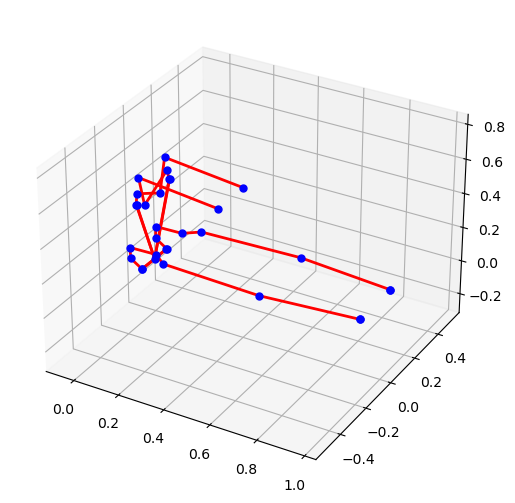

In [7]:
plot_skeleton_state(zero_pose)

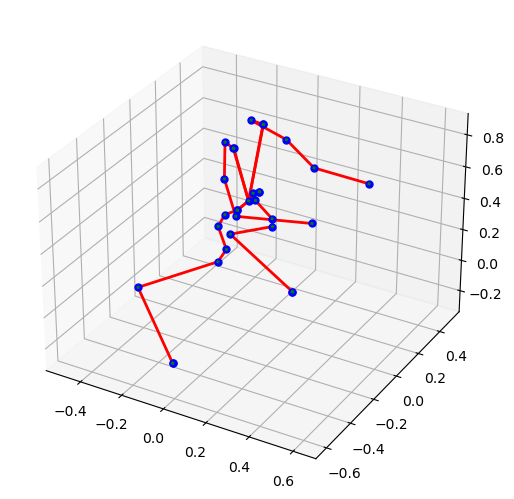

Entered interactive plot - press 'n' to quit, 'h' for a list of commands


In [ ]:
x_np = np.load("/home/dan/Projects/dynamic_motion_imitation/IsaacGymEnvs/isaacgymenvs/retargetted_digit_body_orientations_neutral.npy", allow_pickle=True)
tensor_backend = {
        "arr": x_np,
        "context": {
            "dtype": x_np.dtype.name
        }}
idx = 0
rot = []
for x_np_ in x_np:
    rot_dict = x_np[0]
    rot_dict["torso"] = np.array([0,0,0,1])
    rot_list = np.array([rot_dict[name] for name in node_names])
    rot.append(torch.from_numpy(rot_list))
motion_rot = torch.stack(rot,dim=0)
    

translation = torch.zeros([x_np.shape[0],3])
translation[:,0]=torch.linspace(0,2,x_np.shape[0])
translation[:,1]=0
translation[:,2]=0.5

walk_pose =  SkeletonState.from_rotation_and_root_translation(
                         skeleton_tree=skel_tree,
                         r=motion_rot,
                         t=translation,
                         is_local=False
                     )
walk_motion = SkeletonMotion.from_skeleton_state(walk_pose,30)

plot_skeleton_motion_interactive(walk_motion)

In [ ]:
# walk_pose = SkeletonState(SkeletonState._to_state_vector(torch.from_numpy(x_np), torch.Tensor([0,0,0])), skel_tree, is_local=False)
# rot = zero_pose.global_rotation.clone()
idx +=10
rot = torch.from_numpy(x_np[idx])
rot = torch.cat((torch.tensor([[0,0,0,1]]), rot))
skeleton_states = []
for i in range(0,100,len(x_np)):
    rot = torch.from_numpy(x_np[i])
    rot = torch.cat((torch.tensor([[0,0,0,1]]), rot))
    walk_pose =  SkeletonState.from_rotation_and_root_translation(
                         skeleton_tree=skel_tree,
                         r=rot,
                         t=zero_pose.root_translation,
                         is_local=False
                     )
    skeleton_states.append(walk_pose)
    

In [140]:
rot.size()

torch.Size([31, 4])

In [23]:
print(node_names)

['torso', 'left_hip_roll', 'left_hip_yaw', 'left_hip_pitch', 'left_knee', 'left_shin', 'left_tarsus', 'left_toe_pitch', 'left_toe_roll', 'left_shoulder_roll', 'left_shoulder_cap', 'left_shoulder_pitch', 'left_shoulder_yaw', 'left_elbow', 'right_hip_roll', 'right_hip_yaw', 'right_hip_pitch', 'right_knee', 'right_shin', 'right_tarsus', 'right_toe_pitch', 'right_toe_roll', 'right_shoulder_roll', 'right_shoulder_cap', 'left_waist_cap', 'right_waist_cap', 'right_shoulder_pitch', 'right_shoulder_yaw', 'right_elbow', 'right_hand', 'left_hand']
